# AML 3104 MIDTERM EXAM
# Students Performance in Exams
Link to the dataset: https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams
Group 5 Members:
Dinampo, Vengie
Discaya, Neil Patrick
Harjreet, Kaur
Padillo, Rubylyn
Sittisakornsilp, Kriengkrai

# Problem Statement:
The data set consists of the marks secured by the students in various subjects. The objective of this problem is to determine the overall success of student in all areas of math, reading and writing based on other features indicated in the dataset. Since there are three dependent variables involved as the output, think about how can you perform feature engineering to fit this into your model.

# Import all required Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly

# Reading the dataset exams.scv

In [3]:
data=pd.read_csv('exams.csv',encoding='latin-1')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82


In [4]:
data.info() #checking the null and Dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
data.columns #showing the columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [6]:
data.isnull() #checking null values

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [7]:
data.isnull().sum() #summary of null values, if there is any

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
data.shape #dataset shape

(1000, 8)

In [9]:
print('Dataset Details:') #all dataset details Summary
print(f"Dataset has {data.shape[0]} rows and {data.shape[1]} columns")
print(f"Duplicates: {data.duplicated().sum()}")
print(f"Total Missing Values: {data.isna().sum().sum()}")
print(f"Number of rows with missing values: {data.isna().any(axis=1).sum()}")

Dataset Details:
Dataset has 1000 rows and 8 columns
Duplicates: 1
Total Missing Values: 0
Number of rows with missing values: 0


# Renaming columns and Label encoding

In [10]:
data = data.rename(columns={
    'race/ethnicity': 'race_ethnicity',
    'parental level of education': 'parent_education',
    'test preparation course': 'test_preparation_course',
    'math score': 'math_score',
    'reading score': 'reading_score',
    'writing score': 'writing_score',
    'overall success':'overall_success',
})
data.head()

,gender,race_ethnicity,parent_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


# Exploratory Data Analysis (EDA) and Visualization

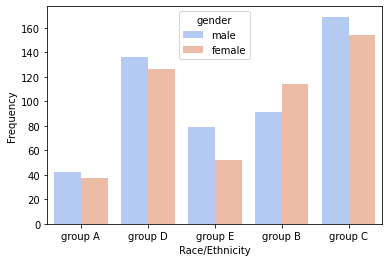

In [11]:
sns.countplot(x=data["race_ethnicity"], hue=data["gender"], palette="coolwarm")
plt.xlabel("Race/Ethnicity")
plt.ylabel("Frequency")
plt.show()

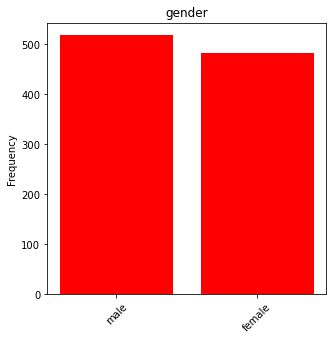

gender: 
male      517
female    483
Name: gender, dtype: int64


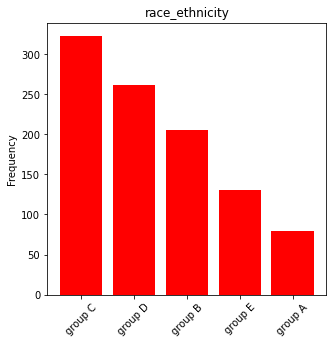

race_ethnicity: 
group C    323
group D    262
group B    205
group E    131
group A     79
Name: race_ethnicity, dtype: int64


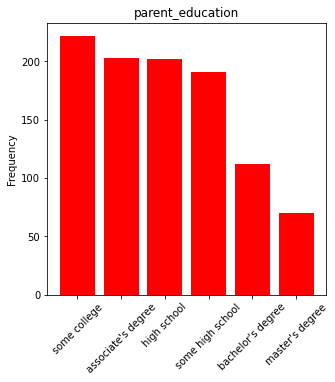

parent_education: 
some college          222
associate's degree    203
high school           202
some high school      191
bachelor's degree     112
master's degree        70
Name: parent_education, dtype: int64


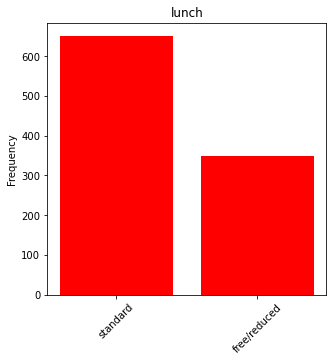

lunch: 
standard        652
free/reduced    348
Name: lunch, dtype: int64


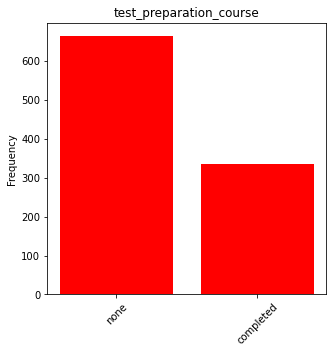

test_preparation_course: 
none         665
completed    335
Name: test_preparation_course, dtype: int64


In [12]:
col = ['gender', 'race_ethnicity', 'parent_education', 'lunch', 'test_preparation_course']

for variable in col:
    var = data[variable]    
    value = var.value_counts()
    
    plt.figure(figsize =(5,5))
    plt.bar(value.index, value, color='red')
    plt.xticks(value.index, value.index.values,rotation=45)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n{}".format(variable,value))

<AxesSubplot:>

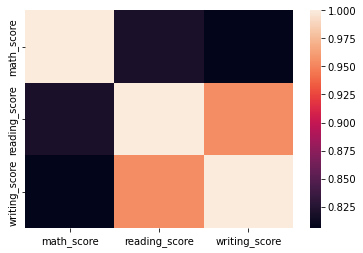

In [13]:
corr = data.corr() #showing correlation using Heatmap
sns.heatmap(data=corr)

In [14]:
avg_education = data[["parent_education","math_score","reading_score","writing_score"]].groupby(["parent_education"]).mean().sort_values(by="math_score",ascending = False)
avg_education 

,math_score,reading_score,writing_score
parent_education,,,
master's degree,71.585714,75.428571,75.885714
bachelor's degree,71.491071,74.008929,74.410714
associate's degree,69.536946,70.985222,70.113300
some college,65.297297,68.045045,66.734234
high school,65.207921,67.400990,64.846535
some high school,60.701571,64.408377,62.539267


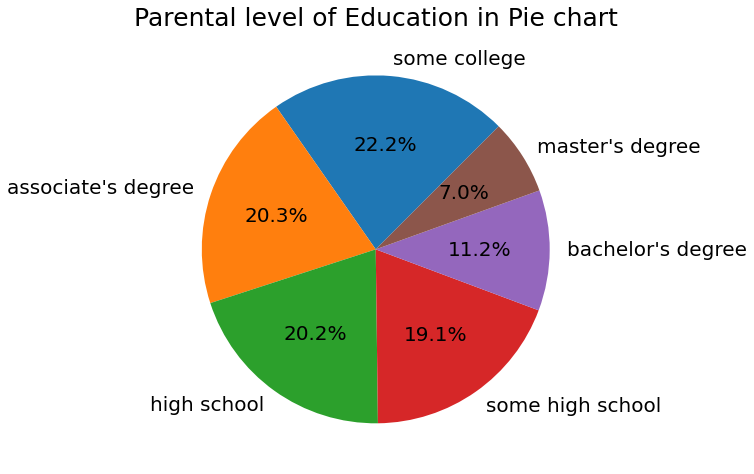

In [15]:
labels = data["parent_education"].value_counts().index
sizes = data["parent_education"].value_counts()
textprops = {"fontsize":20}
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%', startangle=45, textprops =textprops)
plt.title('Parental level of Education in Pie chart',color = 'black',fontsize = 25)
plt.show()  

# Calculating the average of all scores

In [16]:
col = data.loc[: , "math_score":"writing_score"]
col

,math_score,reading_score,writing_score
0,67,67,63
1,40,59,55
2,59,60,50
3,77,78,68
4,78,73,68
...,...,...,...
995,73,70,65
996,85,91,92
997,32,35,41
998,73,74,82


In [17]:
# adding new column named "overall success" which shows the average of three scores
data['overall_success'] = col.mean(axis=1)
data

,gender,race_ethnicity,parent_education,lunch,test_preparation_course,math_score,reading_score,writing_score,overall_success
0,male,group A,high school,standard,completed,67,67,63,65.666667
1,female,group D,some high school,free/reduced,none,40,59,55,51.333333
2,male,group E,some college,free/reduced,none,59,60,50,56.333333
3,male,group B,high school,standard,none,77,78,68,74.333333
4,male,group E,associate's degree,standard,completed,78,73,68,73.000000
...,...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65,69.333333
996,male,group D,associate's degree,free/reduced,completed,85,91,92,89.333333
997,female,group C,some high school,free/reduced,none,32,35,41,36.000000
998,female,group C,some college,standard,none,73,74,82,76.333333


In [18]:
from sklearn import preprocessing
lb=preprocessing.LabelEncoder()

data["gender_1"]=lb.fit_transform(data["gender"])
data["race_ethnicity_1"]=lb.fit_transform(data["race_ethnicity"])
data["test_preparation_course_1"]=lb.fit_transform(data["test_preparation_course"])
data["lunch_1"]=lb.fit_transform(data["lunch"])
data["parent_education_1"]=lb.fit_transform(data["parent_education"])

In [19]:
data.head()

,gender,race_ethnicity,parent_education,lunch,test_preparation_course,math_score,reading_score,writing_score,overall_success,gender_1,race_ethnicity_1,test_preparation_course_1,lunch_1,parent_education_1
0,male,group A,high school,standard,completed,67,67,63,65.666667,1,0,0,1,2
1,female,group D,some high school,free/reduced,none,40,59,55,51.333333,0,3,1,0,5
2,male,group E,some college,free/reduced,none,59,60,50,56.333333,1,4,1,0,4
3,male,group B,high school,standard,none,77,78,68,74.333333,1,1,1,1,2
4,male,group E,associate's degree,standard,completed,78,73,68,73.000000,1,4,0,1,0


# Dropping columns which are irrelevant

In [20]:
df=data.drop(["gender","race_ethnicity","test_preparation_course","lunch","parent_education"],axis=1)
df.head()

,math_score,reading_score,writing_score,overall_success,gender_1,race_ethnicity_1,test_preparation_course_1,lunch_1,parent_education_1
0,67,67,63,65.666667,1,0,0,1,2
1,40,59,55,51.333333,0,3,1,0,5
2,59,60,50,56.333333,1,4,1,0,4
3,77,78,68,74.333333,1,1,1,1,2
4,78,73,68,73.000000,1,4,0,1,0


# Determining dependent and independent variables

In [21]:
y = df["overall_success"]
X = df.drop(['overall_success'], axis=1)

In [22]:
y

0      65.666667
1      51.333333
2      56.333333
3      74.333333
4      73.000000
         ...    
995    69.333333
996    89.333333
997    36.000000
998    76.333333
999    62.333333
Name: overall_success, Length: 1000, dtype: float64

In [23]:
X = df.drop(['race_ethnicity_1', 'lunch_1', 'parent_education_1', 'overall_success'], axis=1)
X.head()

,math_score,reading_score,writing_score,gender_1,test_preparation_course_1
0,67,67,63,1,0
1,40,59,55,0,1
2,59,60,50,1,1
3,77,78,68,1,1
4,78,73,68,1,0


# Splitting the Train and Test dataset

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying ML Algorithm 1 : DecisionTreeRegressor

In [26]:
from sklearn.tree import DecisionTreeRegressor
dec_reg=DecisionTreeRegressor(max_depth=5)
dec_reg
dec_reg.fit(X_train_scaled,y_train)

DecisionTreeRegressor(max_depth=5)

In [27]:
y_pred_dec_reg=dec_reg.predict(X_test_scaled)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_dec_reg})
df

,Actual,Predicted
521,76.666667,77.714286
737,82.000000,83.615385
740,52.000000,54.523810
660,92.000000,87.259887
411,69.666667,70.519481
...,...,...
408,48.000000,50.736111
332,51.000000,50.736111
208,82.333333,82.333333
613,81.000000,81.240741


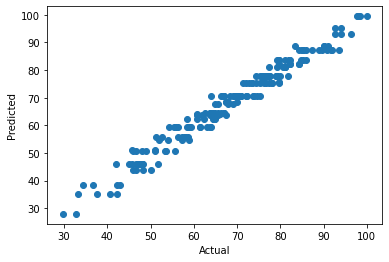

In [28]:
plt.scatter(y_test,y_pred_dec_reg)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [32]:
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_dec_reg))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_dec_reg))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_dec_reg)))
r2_score = r2_score(y_test, y_pred_dec_reg, multioutput='uniform_average')
print('R2 SCORE:', r2_score)

Mean Absolute Error: 2.1827802971422186
Mean Squared Error: 7.088901537174852
Root Mean Squared Error: 2.6624991149622663
R2 SCORE: 0.9680021797425077


# Machine Learning Algorithm 2 : NEURAL NETWORK

In [33]:
#Import packages
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split

In [34]:
model = Sequential()
model.add(Dense(5, input_dim=5, kernel_initializer='normal', activation='relu'))
model.add(Dense(2670, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 2670)              16020     
                                                                 
 dense_2 (Dense)             (None, 1)                 2671      
                                                                 
Total params: 18,721
Trainable params: 18,721
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(loss='mean_squared_error', optimizer='adam',
              metrics=['mean_absolute_error'])

In [36]:
history = model.fit(X_train, y_train, epochs=10,
                    batch_size=30, validation_data=(X_test, y_test))

Epoch 1/10
27/27 [==============================] - 3s 25ms/step - loss: 2355.6768 - mean_absolute_error: 43.5902 - val_loss: 2.3940 - val_mean_absolute_error: 1.2666
Epoch 2/10
27/27 [==============================] - 0s 7ms/step - loss: 73.8965 - mean_absolute_error: 7.0756 - val_loss: 33.9845 - val_mean_absolute_error: 5.5291
Epoch 3/10
27/27 [==============================] - 0s 7ms/step - loss: 7.4739 - mean_absolute_error: 2.1742 - val_loss: 1.1377 - val_mean_absolute_error: 0.8630
Epoch 4/10
27/27 [==============================] - 0s 7ms/step - loss: 1.3206 - mean_absolute_error: 0.9179 - val_loss: 0.9260 - val_mean_absolute_error: 0.7920
Epoch 5/10
27/27 [==============================] - 0s 7ms/step - loss: 0.9787 - mean_absolute_error: 0.7855 - val_loss: 0.8957 - val_mean_absolute_error: 0.7758
Epoch 6/10
27/27 [==============================] - 0s 7ms/step - loss: 0.8984 - mean_absolute_error: 0.7617 - val_loss: 0.8864 - val_mean_absolute_error: 0.7695
Epoch 7/10
27/27 [===

In [37]:
predictions = model.predict(X_test)
predictions

7/7 [==============================] - 0s 3ms/step


array([[76.84539 ],
       [81.61408 ],
       [52.52904 ],
       [89.87905 ],
       [70.29465 ],
       [68.62992 ],
       [96.672806],
       [77.894775],
       [79.37565 ],
       [77.092316],
       [60.62217 ],
       [57.522537],
       [58.142433],
       [72.03733 ],
       [36.93536 ],
       [34.994026],
       [81.50268 ],
       [75.6079  ],
       [74.66249 ],
       [82.73687 ],
       [53.470512],
       [75.724   ],
       [70.00583 ],
       [91.09013 ],
       [66.05753 ],
       [92.51369 ],
       [76.734604],
       [80.41846 ],
       [71.97128 ],
       [58.9791  ],
       [80.02157 ],
       [66.711685],
       [45.611507],
       [84.1476  ],
       [75.76609 ],
       [60.91674 ],
       [71.59462 ],
       [88.83459 ],
       [67.1191  ],
       [55.5785  ],
       [59.06841 ],
       [97.38407 ],
       [47.94642 ],
       [58.795506],
       [43.828777],
       [75.11985 ],
       [64.21257 ],
       [71.06738 ],
       [66.17763 ],
       [67.70388 ],


In [39]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.7386664867401126
Mean Squared Error: 0.8206576494494248
Root Mean Squared Error: 0.9059015671966931
